In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.io
from scipy.optimize import minimize

In [3]:
data=scipy.io.loadmat('ex3data1.mat')

In [4]:
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
x=data['X'] #input images data

In [7]:
x.shape

(5000, 400)

In [8]:
y=data['y']

In [9]:
y.shape

(5000, 1)

In [10]:
#randomly select 100 datapoints to display
rand_indices=np.random.permutation(np.size(x,0))
sel=x[rand_indices[0:100],:]
sel.shape

(100, 400)

In [11]:
def displayData(X):
    [m,n]=[np.size(X,0) , np.size(X,1)]
    
    #computer rows and columns
    height = np.round(np.sqrt(np.size(X,1)))
    width = n / height
    
    #Compute number of items to display
    disp_rows = np.floor(np.sqrt(m))
    disp_cols= np.ceil(m/disp_rows)
    
    #Setup blank display
    disp_array = -np.ones((np.int(disp_rows*height) , np.int(disp_cols*width)))
    
    # Copy each example into a patch on the display array
    a=[]
    curr_ex = 0
    for j in range(int(disp_rows)):
        for i in range(int(disp_cols)):
            if curr_ex > m:
                break
                # Get the max value of the patch
            
            max_val = np.max(np.abs(X[curr_ex, :]))
            disp_array[i*int(width):i*int(width)+int(width),j*int(height):j*int(height)+int(height)]=((np.reshape(X[curr_ex,:].T, (int(height),int(width))))/ max_val)
            curr_ex = curr_ex + 1
        if curr_ex > m: 
            break
    plt.figure(figsize=(6,6))
    plt.imshow(disp_array.T)
    

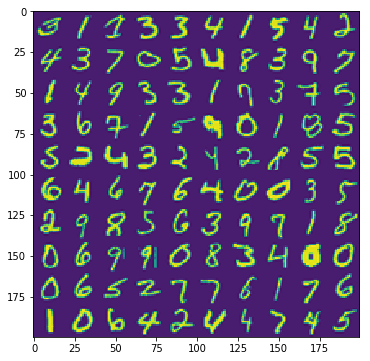

In [12]:
displayData(sel)

In [13]:
def sigmoid(Z):
    return(1.0/(1.0+np.exp(-Z)))

In [14]:
def lrcostfunction(Theta,X,Y,lambda_par):
    Theta=np.matrix(Theta)
    X=np.matrix(X)
    Y=np.matrix(Y)
    m=len(X)
    cost=(-(Y.T*np.log(sigmoid(X*Theta.T)))-((1-Y).T*np.log(1-sigmoid(X*Theta.T))))/m
    reg=(lambda_par/(2*m))*np.sum(np.power(Theta[:,1:Theta.shape[1]],2))
    return cost+reg
    

In [41]:
def Gradient(Theta,X,Y,lambda_par):
    Theta = np.matrix(Theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    
    error = sigmoid(X * Theta.T) - Y

    grad = ((X.T * error) / len(X)).T + ((lambda_par / len(X)) * Theta)

    # intercept gradient is not regularized
    grad[0] = grad[0]-((lambda_par/len(X)))*Theta[0]

    return np.array(grad)

In [36]:
def OneVsAll(X,Y,num_labels,lambda_par):
    [m,n]=[X.shape[0],X.shape[1]]
    all_theta=np.zeros((num_labels,n+1))
    X = np.insert(X, 0, values=np.ones(m), axis=1)
    
    for c in range(num_labels):
        theta=np.zeros((n+1,1))
        #method TNC-Truncated Newton algorithm
        fmin = minimize(fun=lrcostfunction, x0=theta, args=(X,Y==(c+1),lambda_par), method='TNC', jac=Gradient)
        all_theta[c,:] = fmin.x
    return all_theta

In [42]:
all_theta=OneVsAll(x,y,10,1)

In [33]:
def predict_all(X, all_theta):  
    m = X.shape[0]
    n = X.shape[1]
    num_labels = all_theta.shape[0]

    # insert ones to match the shape
    X = np.insert(X, 0, values=np.ones(m), axis=1)

    # convert to matrices
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)

    # compute the class probability for each class on each training instance
    h = sigmoid(X * all_theta.T)

    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)

    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax +1

    return h_argmax

In [43]:
y_pred = predict_all(data['X'], all_theta)  
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]  
accuracy = (sum(correct)) / float(len(correct))
print (accuracy * 100)


94.26
